In [94]:
#Setting the dependencies and kpi Key
#If you havent install citypy don forget to run pip install citpy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from citipy import citipy
import seaborn as sns

api_key="80fded64a8730f6431a58a549bf8890e"
#Range of latitudes and longitudes 
lat_range = (-10, 10)
lng_range = (-180, 180)

In [95]:
# List for lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [96]:
#Find cities near equator 
latitude = 0
cities = []
countries = []
columns = ['City', 'Country', 'Max Temperature', 'Humidity', 'Wind Speed', 'Cloudiness', 'Longitude', 'Latitude']

for longitude in range(-180,180): 
    city = citipy.nearest_city(latitude,longitude)
    cities.append(city.city_name)
    countries.append(city.country_code)
    
equatorial_cities = {'City': cities, 'Country': countries}

equatorial_cities_df=pd.DataFrame(equatorial_cities, columns=columns).drop_duplicates().reset_index(drop=True)
equatorial_cities_df.head()

,City,Country,Max Temperature,Humidity,Wind Speed,Cloudiness,Longitude,Latitude
0,vaitupu,wf,NaN,NaN,NaN,NaN,NaN,NaN
1,saleaula,ws,NaN,NaN,NaN,NaN,NaN,NaN
2,samalaeulu,ws,NaN,NaN,NaN,NaN,NaN,NaN
3,lufilufi,ws,NaN,NaN,NaN,NaN,NaN,NaN
4,samusu,ws,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {"q":'', "APPID":api_key}
count=0
backup_weather_data=False

# Use iterrows to iterate through pandas dataframe
for index, row in equatorial_cities_df.iterrows():

   
    city_and_country = f"{row['City']},{row['Country']}"

    params['q'] = city_and_country
    
    try:
        response = requests.get(base_url, params=params).json()
        results  = response.get('cod')
        city     = response.get('name')
        
        if results == 200:
            sys     = response['sys']
            country = sys['country']
            weather_metrics = f"\n{city}, {country}: "
            
            main    = response['main']
            temp    = round((float(main['temp_max']) - 273),2) # Convert Kelvin to Celsius
            humid   = main['humidity']
            equatorial_cities_df.set_value(index, "Max Temperature", temp)
            equatorial_cities_df.set_value(index, "Humidity",        humid)
            weather_metrics += f"max temp: {temp} humidity: {humid} "
            
            wind    = response['wind']
            speed   = wind['speed']
            equatorial_cities_df.set_value(index, "Wind Speed", speed)
            weather_metrics += f"wind: {speed} "
            
            clouds  = response['clouds']
            clouds  = clouds['all']
            equatorial_cities_df.set_value(index, "Cloudiness", clouds)
            weather_metrics += f"clouds: {clouds} "
            
            coord   = response['coord']
            lon     = coord['lon']
            lat     = coord['lat']
            equatorial_cities_df.set_value(index, "Longitude", lon)
            equatorial_cities_df.set_value(index, "Latitude",  lat)
            weather_metrics += f"lon: {lon} lat: {lat} "
            
            print(weather_metrics)
            print('-' * 80)
            
        else:
            if count >= 60:
                print(response)
                backup_weather_data = True
                print('-' * 80)
                break
            count += 1            
            
    except:
        continue

C:\Users\zsantiba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\zsantiba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\zsantiba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\zsantiba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\zsantiba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: set_v


Lufilufi, WS: max temp: 30.15 humidity: 66 wind: 5.7 clouds: 75 lon: -171.6 lat: -13.87 
--------------------------------------------------------------------------------

Faanui, PF: max temp: 25.48 humidity: 83 wind: 8.72 clouds: 43 lon: -151.75 lat: -16.48 
--------------------------------------------------------------------------------

Atuona, PF: max temp: 26.65 humidity: 72 wind: 4.78 clouds: 64 lon: -139.03 lat: -9.8 
--------------------------------------------------------------------------------

San Patricio, MX: max temp: 24.97 humidity: 93 wind: 1.18 clouds: 100 lon: -104.7 lat: 19.22 
--------------------------------------------------------------------------------

Coahuayana, MX: max temp: 23.33 humidity: 92 wind: 0.71 clouds: 100 lon: -100.35 lat: 18.62 
--------------------------------------------------------------------------------

Lazaro Cardenas, MX: max temp: 21.15 humidity: 68 wind: 3.6 clouds: 5 lon: -105.62 lat: 28.39 
------------------------------------------


Axim, GH: max temp: 25.21 humidity: 86 wind: 4.85 clouds: 88 lon: -2.24 lat: 4.87 
--------------------------------------------------------------------------------

Takoradi, GH: max temp: 23.56 humidity: 91 wind: 2.34 clouds: 84 lon: -1.75 lat: 4.89 
--------------------------------------------------------------------------------

Mumford, GH: max temp: 22.55 humidity: 96 wind: 1.54 clouds: 100 lon: -0.76 lat: 5.26 
--------------------------------------------------------------------------------

Anloga, GH: max temp: 25.15 humidity: 88 wind: 5.7 clouds: 20 lon: 0.9 lat: 5.79 
--------------------------------------------------------------------------------

Port-Gentil, GA: max temp: 25.82 humidity: 84 wind: 4.69 clouds: 87 lon: 8.78 lat: -0.72 
--------------------------------------------------------------------------------

Libreville, GA: max temp: 25.15 humidity: 88 wind: 3.6 clouds: 75 lon: 9.45 lat: 0.39 
-------------------------------------------------------------------------


Sorong, ID: max temp: 27.4 humidity: 87 wind: 3.1 clouds: 24 lon: 131.25 lat: -0.86 
--------------------------------------------------------------------------------

Manokwari, ID: max temp: 25.45 humidity: 86 wind: 1.57 clouds: 86 lon: 134.08 lat: -0.87 
--------------------------------------------------------------------------------

Biak, ID: max temp: 25.24 humidity: 51 wind: 2.71 clouds: 8 lon: 122.88 lat: -0.91 
--------------------------------------------------------------------------------

Vanimo, PG: max temp: 28.9 humidity: 69 wind: 2.76 clouds: 100 lon: 141.3 lat: -2.67 
--------------------------------------------------------------------------------

Aitape, PG: max temp: 30.14 humidity: 64 wind: 3.75 clouds: 89 lon: 142.36 lat: -3.15 
--------------------------------------------------------------------------------

Lorengau, PG: max temp: 27.97 humidity: 82 wind: 3.3 clouds: 100 lon: 147.27 lat: -2.02 
--------------------------------------------------------------------

In [98]:
equatorial_cities_df = equatorial_cities_df.dropna(axis=0, how='any').reset_index(drop=True)

equatorial_cities_df.to_csv('cities.csv', index=False)

date = time.strftime("%m/%d/%Y")

if backup_weather_data:
    equatorial_cities_df = pd.read_csv('cities.csv')
    date = '10/10/2019'
    
print(f"There are {equatorial_cities_df.shape[0]} equatorial cities with weather data available in dataframe.")
equatorial_cities_df.head()

There are 107 equatorial cities with weather data available in dataframe.


,City,Country,Max Temperature,Humidity,Wind Speed,Cloudiness,Longitude,Latitude
0,lufilufi,ws,30.15,66,5.7,75,-171.6,-13.87
1,faanui,pf,25.48,83,8.72,43,-151.75,-16.48
2,atuona,pf,26.65,72,4.78,64,-139.03,-9.8
3,san patricio,mx,24.97,93,1.18,100,-104.7,19.22
4,coahuayana,mx,23.33,92,0.71,100,-100.35,18.62


In [108]:
def create_scatter(data, **kwargs):
    
        sns.set() # sets seaborn grid
        sns.lmplot(x=kwargs['xdata'], y=kwargs['ydata'], data=data, fit_reg=False, legend_out=False)

        plt.title(kwargs['title'])
        plt.xlabel(kwargs['xlabel'])
        plt.ylabel(kwargs['ylabel'])

        plt.show()


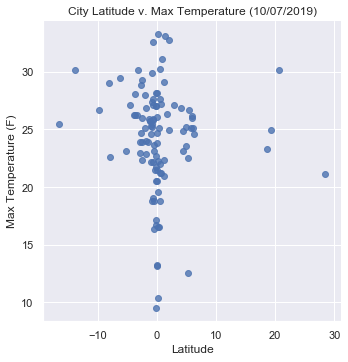

In [109]:
title  = f'City Latitude v. Max Temperature ({date})'
xlabel = 'Latitude'
ylabel = 'Max Temperature (F)'
xdata  = 'Latitude'
ydata  = 'Max Temperature'
alpha=.80

create_scatter(data=equatorial_cities_df, title=title, xlabel=xlabel, ylabel=ylabel, xdata=xdata, ydata=ydata)

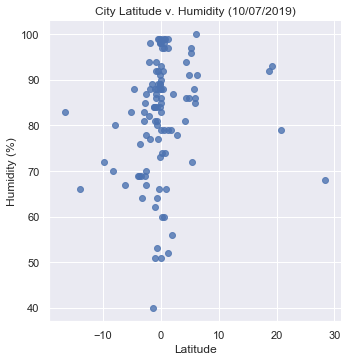

In [110]:
title  = f'City Latitude v. Humidity ({date})'
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
xdata  = 'Latitude'
ydata  = 'Humidity'

create_scatter(data=equatorial_cities_df, title=title, xlabel=xlabel, ylabel=ylabel, xdata=xdata, ydata=ydata)